# This notebook will use a simple empirical model based on field data to illustrate how emitted call intensities vary with angle in bats. 

## We will follow the fitted function in equation 11 of [Giuggioli et al. 2015](http://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1004089). The third term quantifies the call directionality with the following equation :

## $ Call\ Directionality\ Factor(dB)\ = (A+2)[cos(\theta_{emission}) -1]$, where $A$ is the asymmetry parameter. 
## Giuggioli et al. 2015 use A = 7.3 for their simulations, as the best fit with the data obtained from the field. This is how it looks like :

In [4]:
import numpy as np 
import matplotlib.pyplot as plt 

def call_directionality_factor(A,theta):
    '''
    Third term in equation 11 of Giuggioli et al. 2015
    
    '''
    call_dirn = A*(np.cos(theta)-1)
    
    return(call_dirn)    


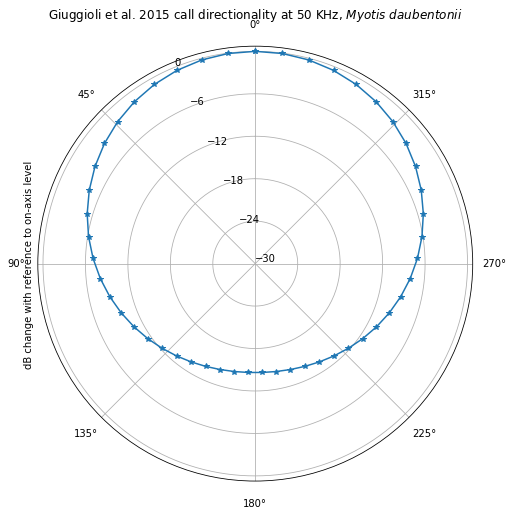

In [5]:
theta_emsn = np.linspace(0,2*np.pi,50)
giuggioli_dirnlty = call_directionality_factor(7.3,theta_emsn)

plt.figure(figsize=(12,8))
ax = plt.subplot(111,projection='polar')
ax.plot(theta_emsn,giuggioli_dirnlty,'*-');ax.set_rticks(np.arange(-30,6,6))
ax.set_theta_zero_location('N');ax.set_title('Giuggioli et al. 2015 call directionality at 50 KHz, $Myotis\ daubentonii$')
ax.set_ylabel('dB change with reference to on-axis level')
plt.show()

## The asymmetry parameter here affects how much of a drop there is as we move off-axis. Let us see some illustrative plots for A = [3,7.3,11]


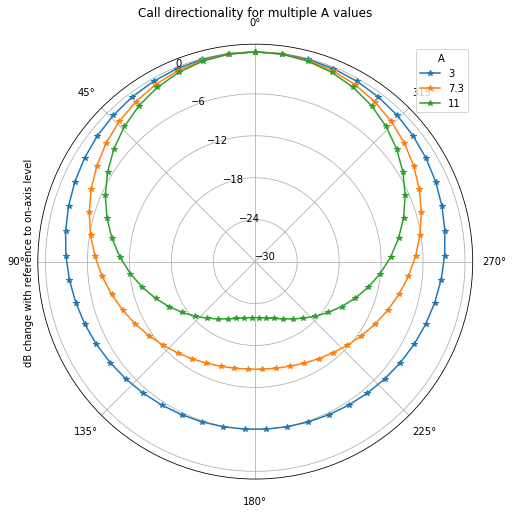

In [3]:
A_values = [3,7.3,11]
calc_calldirn_forAs = lambda A_value : call_directionality_factor(A_value,theta_emsn)
call_dirns = map(calc_calldirn_forAs,A_values)
plt.figure(figsize=(12,8))

for each_A,each_calldirn in zip(A_values,call_dirns):
    ax = plt.subplot(111,projection='polar')
    ax.plot(theta_emsn,each_calldirn,'*-',label=str(each_A));ax.set_rticks(np.arange(-30,6,6))
    
    
ax.set_theta_zero_location('N');ax.set_title('Call directionality for multiple A values')
ax.set_ylabel('dB change with reference to on-axis level')
ax.legend(title='A')

plt.show()

## The figure above shows that changes in asymmetery parameter A affect the call directionality greatly - and with this we can recreate scenarios where bats are calling with wide and narrow beams. 